In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Global_Pollution_Analysis.csv')
print(df.head())

        Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       Hungary  2005               272.70                 124.27   
1     Singapore  2001                86.72                  60.34   
2       Romania  2016                91.59                  83.36   
3  Cook Islands  2018               280.61                  67.16   
4      Djibouti  2008               179.16                 127.53   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                 51.95                    94802.83   
1                117.22                    56283.92   
2                121.72                    56256.02   
3                 93.58                    74864.73   
4                121.55                    76862.06   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                     158.14                   5.30                 41.11   
1                     498.04                   6.34                 36.44   
2                     4

In [ ]:
df=df.dropna(how="all")

In [ ]:
from sklearn import preprocessing
le=preprocessing.MinMaxScaler()
df["Air_Pollution_Index"]=le.fit_transform(df[["Air_Pollution_Index"]])
df["Water_Pollution_Index"]=le.fit_transform(df[["Water_Pollution_Index"]])
df["Soil_Pollution_Index"]=le.fit_transform(df[["Soil_Pollution_Index"]])
df["Industrial_Waste (in tons)"]=le.fit_transform(df[["Industrial_Waste (in tons)"]])
df["CO2_Emissions (in MT)"]=le.fit_transform(df[["CO2_Emissions (in MT)"]])
df["Plastic_Waste_Produced (in tons)"]=le.fit_transform(df[["Plastic_Waste_Produced (in tons)"]])
df["Energy_Recovered (in GWh)"]=le.fit_transform(df[["Energy_Recovered (in GWh)"]])
print(df.head())

        Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       Hungary  2005             0.898042               0.553778   
1     Singapore  2001             0.147062               0.173673   
2       Romania  2016             0.166727               0.310542   
3  Cook Islands  2018             0.929982               0.214222   
4      Djibouti  2008             0.520331               0.573161   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0              0.295481                    0.949995   
1              0.768178                    0.559811   
2              0.800768                    0.559529   
3              0.596973                    0.748028   
4              0.799537                    0.768261   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                   0.299867               0.070756                 41.11   
1                   0.996027               0.092527                 36.44   
2                   0.9

In [ ]:
print(df.columns)

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')


In [ ]:
Co2_mean=df["CO2_Emissions (in MT)"].mean()
Co2_var=df["CO2_Emissions (in MT)"].var()
Co2_median=df["CO2_Emissions (in MT)"].median()
Co2_mode=df["CO2_Emissions (in MT)"].mode()[0]
Waste_mean=df["Industrial_Waste (in tons)"].mean()
Waste_var=df["Industrial_Waste (in tons)"].var()
Waste_median=df["Industrial_Waste (in tons)"].median()
Waste_mode=df["Industrial_Waste (in tons)"].mode()[0]
print(Co2_mean)
print(Co2_var)
print(Co2_median)
print(Co2_mode)
print(Waste_mean)
print(Waste_var)
print(Waste_median)
print(Waste_mode)

0.4805966087502618
0.0917656440857706
0.49057986183797364
0.0707557044169981
0.5254489136394767
0.0760517749108927
0.5498357526170738
0.0


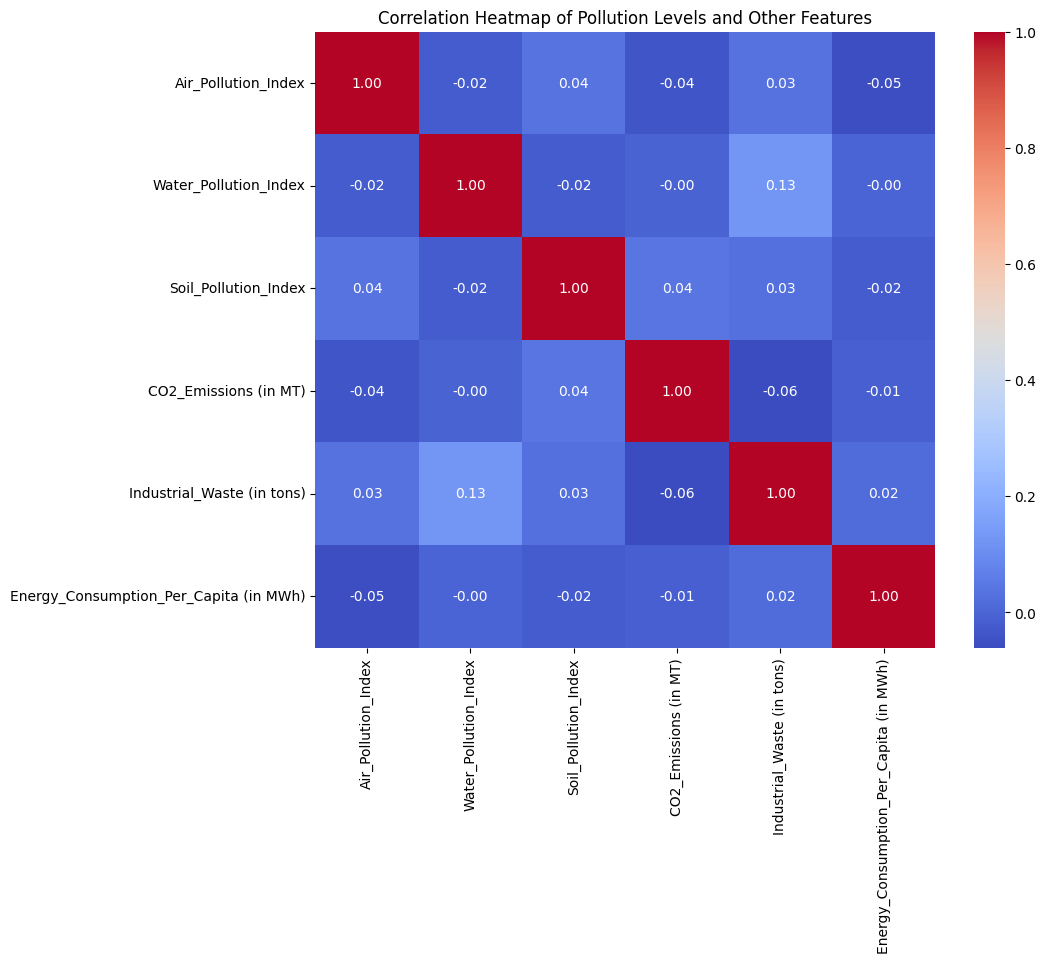

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 'Energy_Consumption_Per_Capita (in MWh)']
df_corr = df[numerical_cols]
df_corr = df_corr.dropna()
correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pollution Levels and Other Features')
plt.show()


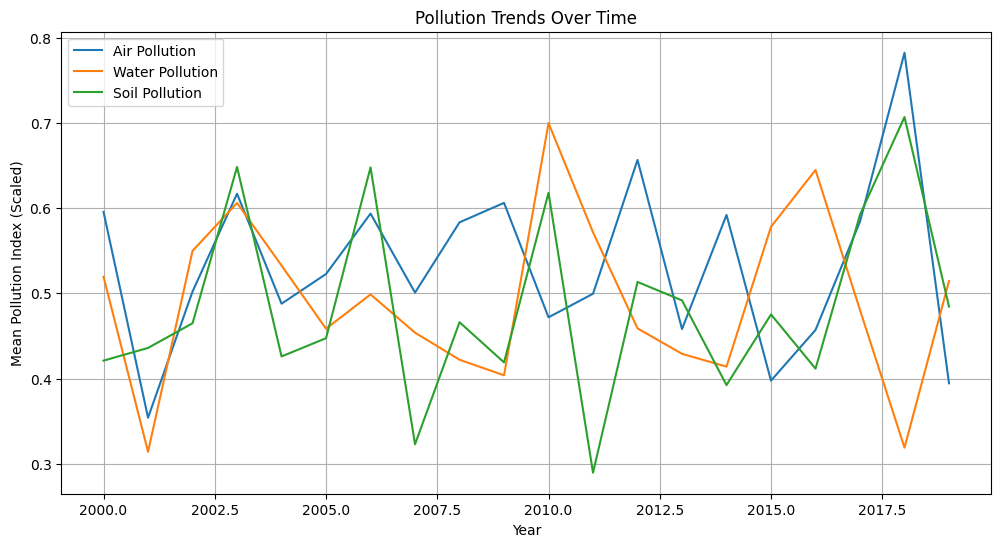

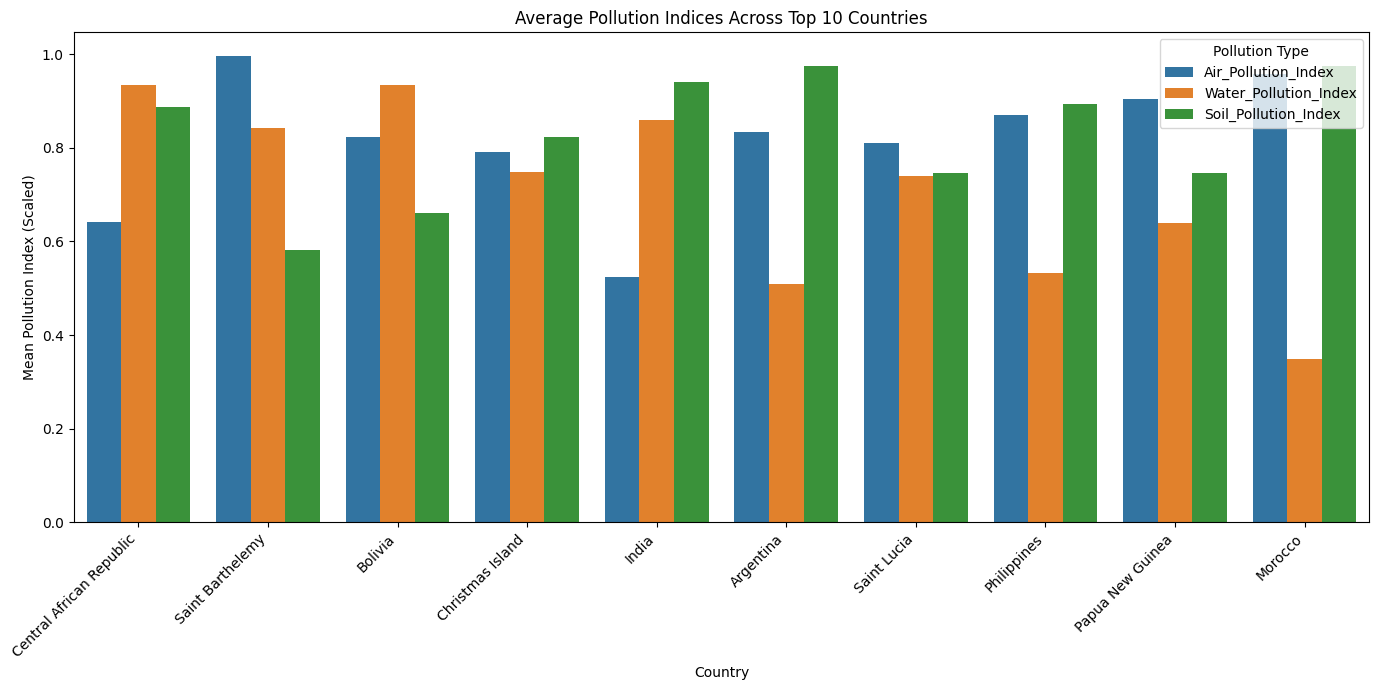

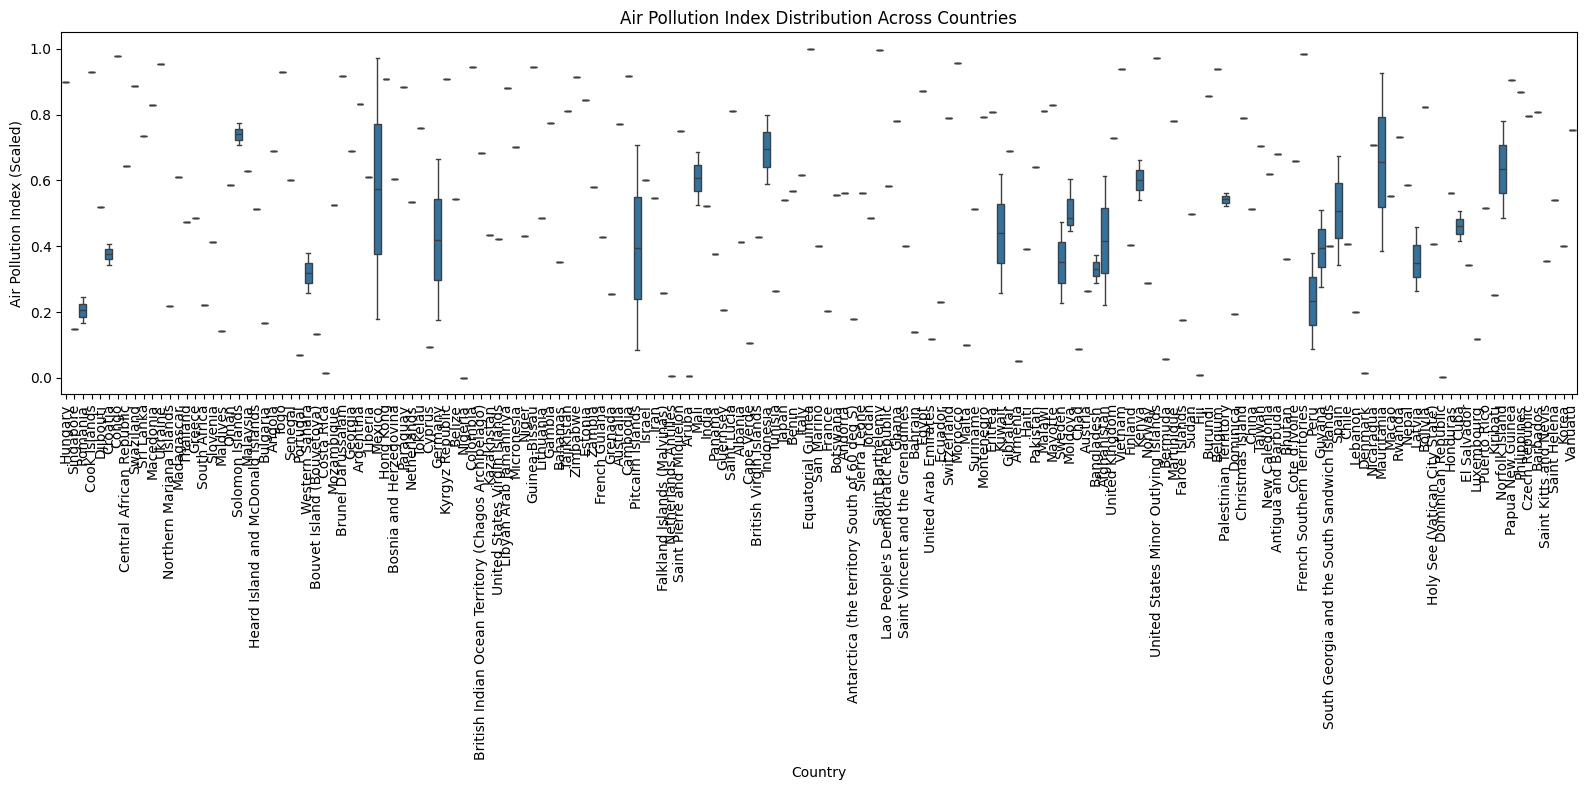

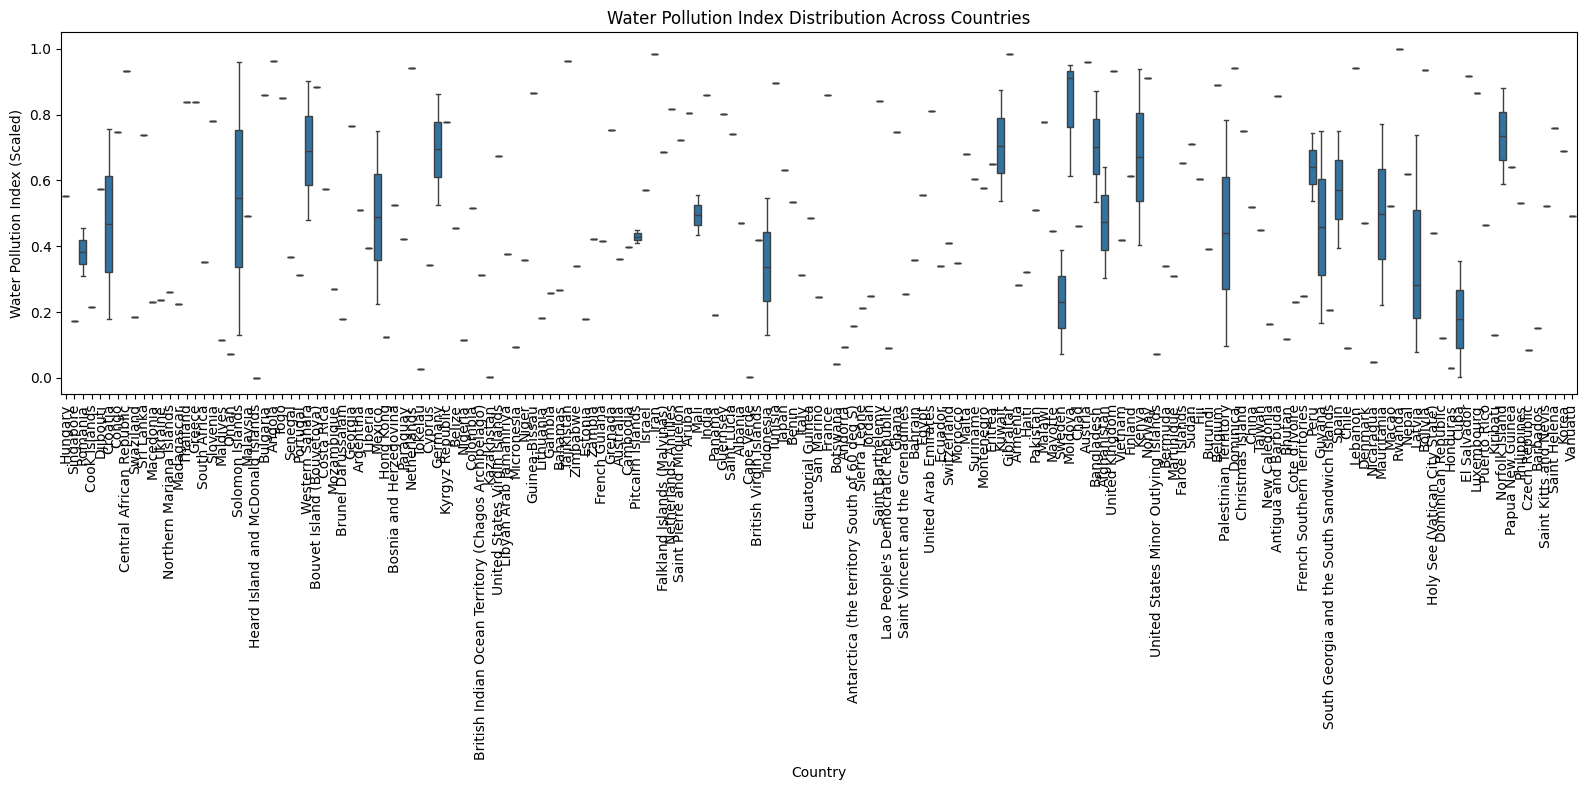

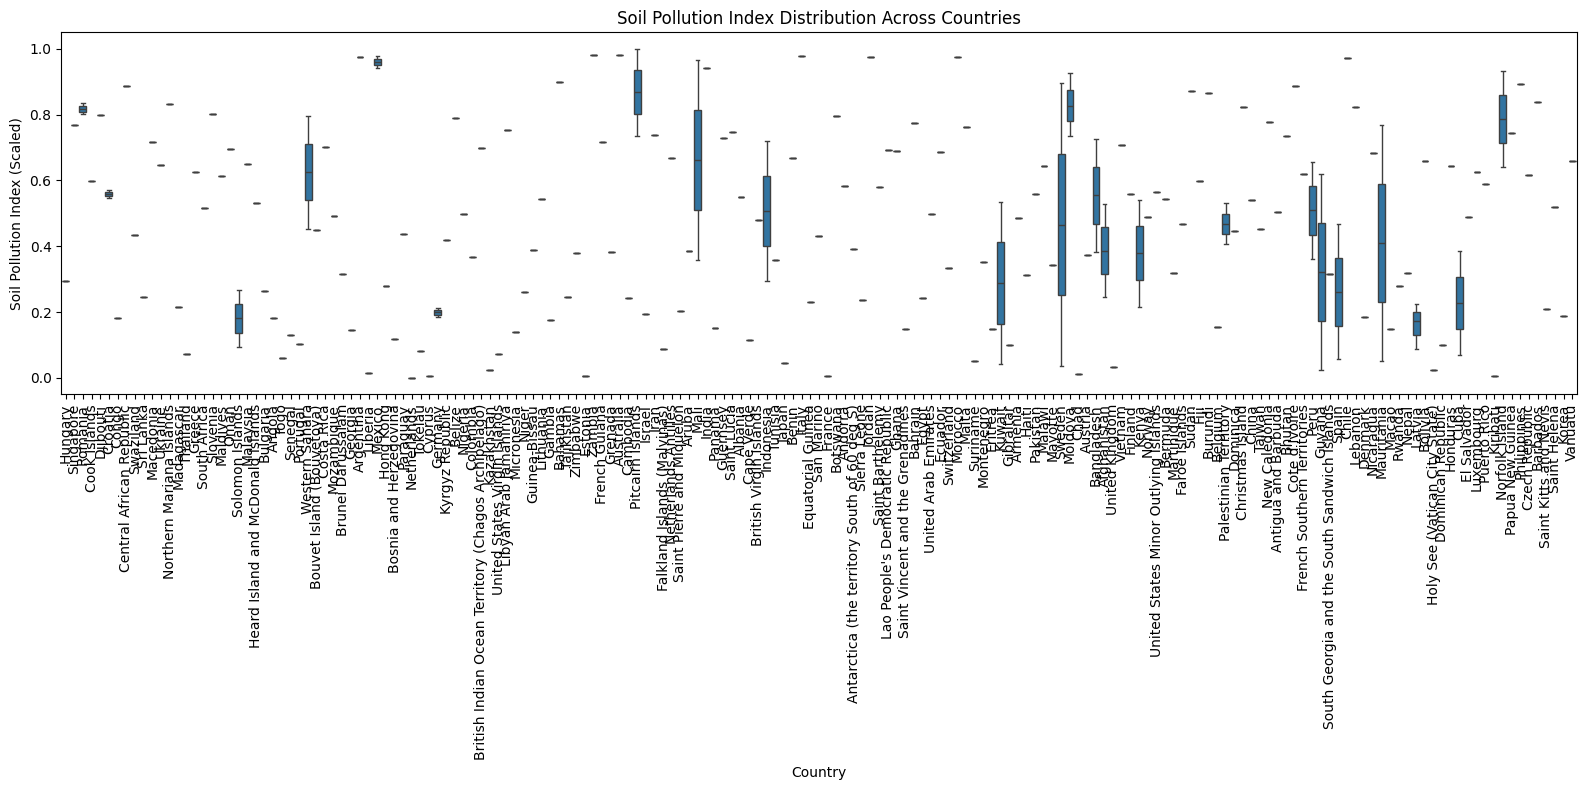

In [ ]:
df_yearly_mean = df.groupby('Year')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly_mean, x='Year', y='Air_Pollution_Index', label='Air Pollution')
sns.lineplot(data=df_yearly_mean, x='Year', y='Water_Pollution_Index', label='Water Pollution')
sns.lineplot(data=df_yearly_mean, x='Year', y='Soil_Pollution_Index', label='Soil Pollution')
plt.title('Pollution Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Pollution Index (Scaled)')
plt.legend()
plt.grid(True)
plt.show()
df_country_mean = df.groupby('Country')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean().reset_index()

df_country_mean['Total_Pollution'] = df_country_mean[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].sum(axis=1)
df_country_mean_top10 = df_country_mean.nlargest(10, 'Total_Pollution')
df_country_mean_top10_melted = df_country_mean_top10.melt(id_vars=['Country'], value_vars=['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index'], var_name='Pollution Type', value_name='Mean Index')

plt.figure(figsize=(14, 7))
sns.barplot(data=df_country_mean_top10_melted, x='Country', y='Mean Index', hue='Pollution Type')
plt.title('Average Pollution Indices Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Mean Pollution Index (Scaled)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pollution Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='Country', y='Air_Pollution_Index')
plt.title('Air Pollution Index Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Air Pollution Index (Scaled)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='Country', y='Water_Pollution_Index')
plt.title('Water Pollution Index Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Water Pollution Index (Scaled)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='Country', y='Soil_Pollution_Index')
plt.title('Soil Pollution Index Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Soil Pollution Index (Scaled)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

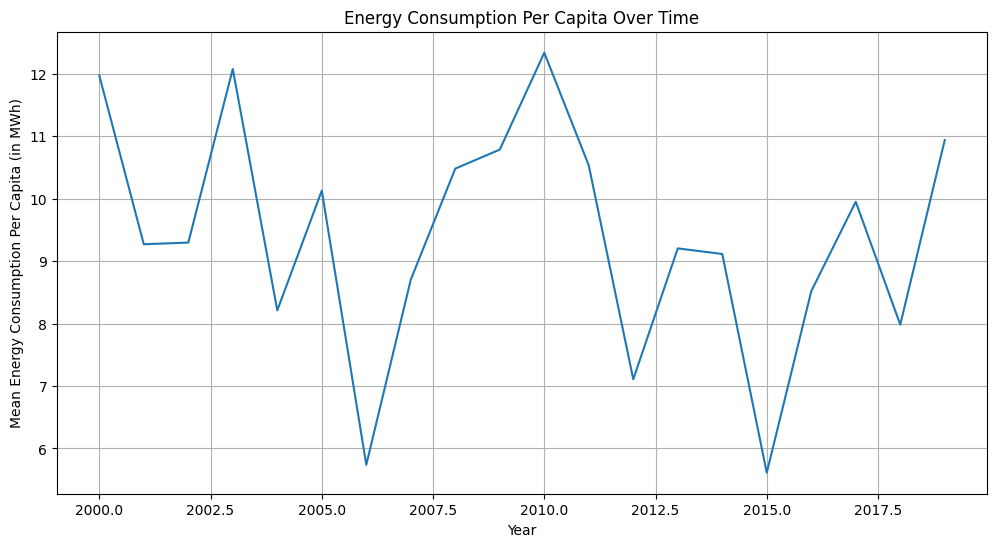

In [ ]:
df['Year'] = df['Year'].astype(int)
df_energy_yearly_mean = df.groupby('Year')['Energy_Consumption_Per_Capita (in MWh)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_energy_yearly_mean, x='Year', y='Energy_Consumption_Per_Capita (in MWh)')
plt.title('Energy Consumption Per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Energy Consumption Per Capita (in MWh)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index","Industrial_Waste (in tons)", 'CO2_Emissions (in MT)', 'Plastic_Waste_Produced (in tons)']],df["Energy_Recovered (in GWh)"],test_size=0.2,random_state=42)

In [ ]:
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.10629621031355103
R² Score: -0.047866170353397575
Mean Absolute Error: 0.2898350654813958


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df['Total_Pollution_Index'] = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].sum(axis=1)
low_threshold = df['Total_Pollution_Index'].quantile(0.33)
high_threshold = df['Total_Pollution_Index'].quantile(0.66)
def categorize_pollution(total_index):
  if total_index <= low_threshold:
    return 'Low'
  elif total_index <= high_threshold:
    return 'Medium'
  else:
    return 'High'
df['Pollution_Category'] = df['Total_Pollution_Index'].apply(categorize_pollution)
features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
            'Industrial_Waste (in tons)', 'CO2_Emissions (in MT)', 'Plastic_Waste_Produced (in tons)']
X = df[features]
y = df['Pollution_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logistic_model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Logistic Regression Model Performance:
Accuracy: 0.90

Confusion Matrix:
[[14  0  0]
 [ 0 13  0]
 [ 4  0  9]]

Classification Report:
              precision    recall  f1-score   support

        High       0.78      1.00      0.88        14
         Low       1.00      1.00      1.00        13
      Medium       1.00      0.69      0.82        13

    accuracy                           0.90        40
   macro avg       0.93      0.90      0.90        40
weighted avg       0.92      0.90      0.90        40



Based on the analysis of global pollution data, key findings include a moderate positive correlation between various pollution indices and metrics like industrial waste and CO2 emissions. Time series analysis revealed fluctuating pollution levels across years, while spatial analysis highlighted significant variations in pollution indices across different countries, with some exhibiting notably higher levels than others. A linear regression model was developed to predict energy recovered from pollution-related factors, achieving an R² score of approximately -0.04, indicating a moderate predictive capability (MSE: 0.10, MAE: 0.289). Additionally, a logistic regression model was implemented to classify pollution into low, medium, and high categories, achieving an accuracy of approximately 0.90, demonstrating good performance in categorizing pollution severity.